In [2]:
import pyart
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
import math
import warnings
from IPython import display
warnings.simplefilter("ignore")

/g/data/eg3/ab4502/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


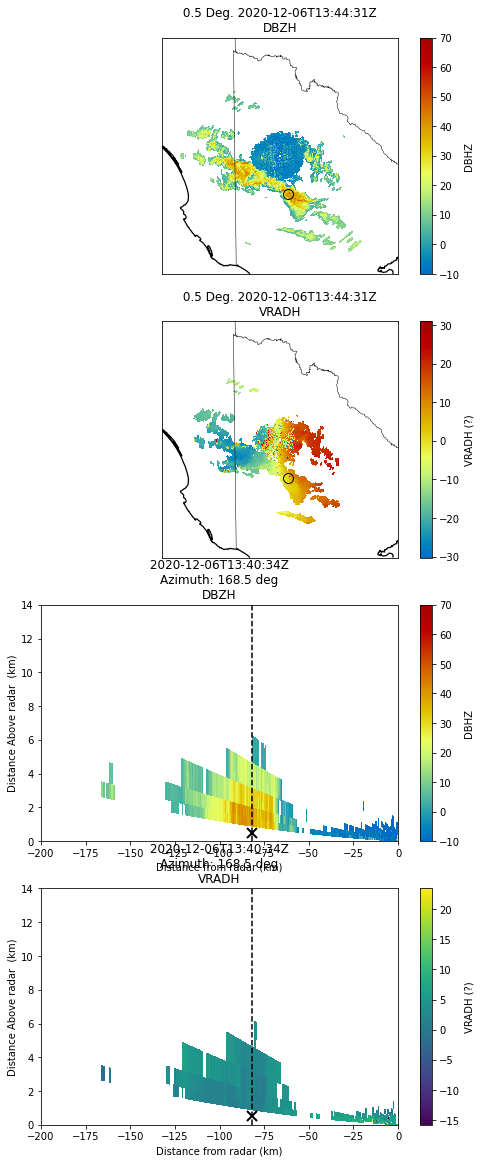

In [112]:
plt.figure(figsize=[8,20])

################################################################
#TIME=1
################################################################

radar = pyart.aux_io.read_odim_h5("/g/data/eg3/ab4502/radar/95_20201206_134034.pvol.h5", file_field_names=True)

clon=142.1962; clat=-36.7189; rlon=radar.longitude["data"][0]; rlat=radar.latitude["data"][0]
xlon=143.6; xlat=-37.92

ax=plt.subplot(4,1,1)
disp=pyart.graph.RadarMapDisplayBasemap(radar)
disp.plot_ppi_map("DBZH",13,cmap=pyart.graph.cm_colorblind.HomeyerRainbow, resolution="h",colorbar_label="DBHZ",\
        projection="aeqd",vmin=-10, vmax=70,ax=ax)
disp.basemap.plot([clon],[clat], marker="o", ms=10, mew=1, ls="-", color="k", latlon=True, mfc="none")

ax=plt.subplot(4,1,2)
disp=pyart.graph.RadarMapDisplayBasemap(radar)
disp.plot_ppi_map("VRADH",13,cmap=pyart.graph.cm_colorblind.HomeyerRainbow, resolution="h",\
        projection="aeqd",ax=ax)
disp.basemap.plot([clon],[clat], marker="o", ms=10, mew=1, ls="-", color="k", latlon=True, mfc="none")

#https://www.omnicalculator.com/other/azimuth
plt.subplot(4,1,3)
disp.plot_azimuth_to_rhi("DBZH",168.52,vmin=-10, vmax=70, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,colorbar_label="DBHZ")
plt.ylim([0,14])
plt.xlim([-200,0])
plt.axvline(-81.85, linestyle="--", color="k")
plt.plot(-81.85, 0.5, marker="x", color="k", ms=10, mew=2)
#plt.title(disp.generate_az_rhi_title("DBZH",265.37).replace(" CLEAN",""))

plt.subplot(4,1,4)
disp.plot_azimuth_to_rhi("VRADH",168.52)
plt.ylim([0,14])
plt.xlim([-200,0])
plt.axvline(-81.85, linestyle="--", color="k")
plt.plot(-81.85, 0.5, marker="x", color="k", ms=10, mew=2)

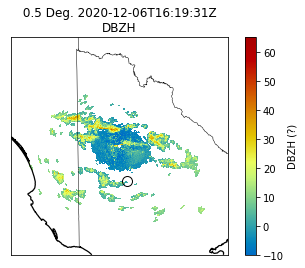

KeyboardInterrupt: 

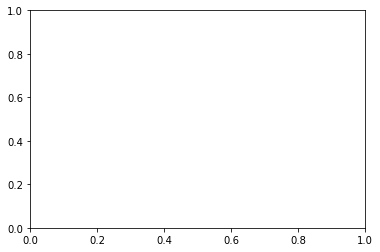

In [113]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
import glob

step=5
for f in np.sort(glob.glob("/g/data/eg3/ab4502/radar/95*"))[150::step]:

    radar = pyart.aux_io.read_odim_h5(f, file_field_names=True)

    plt.figure()
    
    disp=pyart.graph.RadarMapDisplayBasemap(radar)
    c=disp.plot_ppi_map("DBZH",13,cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
    #plt.contourf(radar.fields['DBZH']['data'][radar.get_slice(1)]); plt.colorbar()
    disp.basemap.plot([142.1962],[-36.7189], marker="o", ms=10, mew=1, ls="-", color="k", latlon=True, mfc="none")
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)    
    
    plt.close()


In [110]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (5040,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float64 and shape: (5040,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	DBZH:
		data: <ndarray of type: float32 and shape: (5040, 990)>
		_FillValue: -9999.0
	VRADH:
		data: <ndarray of type: float32 and shape: (5040, 990)>
		_FillValue: -9999.0
	WRADH:
		data: <ndarray of type: float32 and shape: (5040, 990)>
		_FillValue: -9999.0
	TH:
		data: <ndarray of type: float32 and s

In [68]:
radar.elevation

{'units': 'degrees',
 'standard_name': 'beam_elevation_angle',
 'long_name': 'elevation_angle_from_horizontal_plane',
 'axis': 'radial_elevation_coordinate',
 'comment': 'Elevation of antenna relative to the horizontal plane',
 'data': array([90. , 90. , 90. , ...,  0.5,  0.5,  0.5])}